In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip \
    -O /tmp/rps.zip
  
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip \
    -O /tmp/rps-test-set.zip

--2020-09-26 15:54:56--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.204.128, 64.233.189.128, 108.177.97.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.204.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘/tmp/rps.zip’

/tmp/rps.zip        100%[===================>] 191.38M  71.2MB/s    in 2.7s    

2020-09-26 15:54:59 (71.2 MB/s) - ‘/tmp/rps.zip’ saved [200682221/200682221]

--2020-09-26 15:54:59--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.125.128, 74.125.203.128, 74.125.204.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.125.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘/

In [2]:
import os
import zipfile
import tensorflow as tf
import matplotlib.pyplot as plt

train_zip = zipfile.ZipFile('/tmp/rps.zip')
test_zip = zipfile.ZipFile('/tmp/rps-test-set.zip')
train_zip.extractall('/tmp')
test_zip.extractall('/tmp')
train_zip.close()
test_zip.close()

In [16]:
train_dir = '/tmp/rps'
test_dir =  '/tmp/rps-test-set'

In [9]:
print('Train Images: ',
    len(os.listdir('/tmp/rps/rock'))+
    len(os.listdir('/tmp/rps/paper'))+
    len(os.listdir('/tmp/rps/scissors')))

print('Test Images: ',
    len(os.listdir('/tmp/rps-test-set/rock'))+
    len(os.listdir('/tmp/rps-test-set/paper'))+
    len(os.listdir('/tmp/rps-test-set/scissors')))

Train Images:  2520
Test Images:  372


In [34]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data_gen = ImageDataGenerator(rescale=1./255,
                                    rotation_range=40,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    height_shift_range=0.2,
                                    width_shift_range=0.2,
                                    horizontal_flip=True)
val_data_gen = ImageDataGenerator(rescale=1./255)

train_generator = train_data_gen.flow_from_directory(train_dir,
                                                     target_size=(150,150),
                                                     class_mode='categorical',
                                                     batch_size=56) #step = 45
val_generator = val_data_gen.flow_from_directory(test_dir,
                                                 target_size=(150,150),
                                                 class_mode='categorical',
                                                 batch_size=31) #step = 12


Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [35]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(64, (3,3), input_shape=(150,150,3), activation='relu'),
                                  tf.keras.layers.MaxPooling2D(2,2),
                                  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                  tf.keras.layers.MaxPooling2D(2,2),
                                  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
                                  tf.keras.layers.MaxPooling2D(2,2),
                                  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
                                  tf.keras.layers.MaxPooling2D(2,2),
                                  tf.keras.layers.Flatten(),
                                  tf.keras.layers.Dropout(0.5),
                                  tf.keras.layers.Dense(512, activation='relu'),
                                  tf.keras.layers.Dense(3, activation='softmax')])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 15, 15, 128)      

In [36]:
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(lr=0.001),loss='categorical_crossentropy', metrics=['accuracy'])

In [37]:
history= model.fit(train_generator,
                   epochs=25,
                   steps_per_epoch=45,
                   validation_data=val_generator,
                   validation_steps=12,
                   verbose=1)

Epoch 1/25
45/45 [==============================] - 24s 533ms/step - loss: 1.1421 - accuracy: 0.3881 - val_loss: 0.9942 - val_accuracy: 0.5968
Epoch 2/25
45/45 [==============================] - 23s 521ms/step - loss: 0.9936 - accuracy: 0.5274 - val_loss: 0.4706 - val_accuracy: 0.9247
Epoch 3/25
45/45 [==============================] - 24s 525ms/step - loss: 0.7576 - accuracy: 0.6516 - val_loss: 0.5321 - val_accuracy: 0.6909
Epoch 4/25
45/45 [==============================] - 23s 519ms/step - loss: 0.5680 - accuracy: 0.7460 - val_loss: 0.3280 - val_accuracy: 0.9973
Epoch 5/25
45/45 [==============================] - 23s 521ms/step - loss: 0.3969 - accuracy: 0.8385 - val_loss: 0.1355 - val_accuracy: 0.9973
Epoch 6/25
45/45 [==============================] - 23s 520ms/step - loss: 0.2911 - accuracy: 0.8790 - val_loss: 0.0499 - val_accuracy: 1.0000
Epoch 7/25
45/45 [==============================] - 23s 521ms/step - loss: 0.2094 - accuracy: 0.9206 - val_loss: 0.0521 - val_accuracy: 0.9758

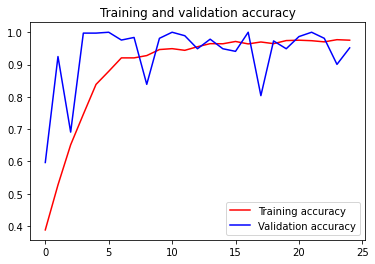

<Figure size 432x288 with 0 Axes>

In [38]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [40]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)

Saving paper-hires2.png to paper-hires2.png
paper-hires2.png
[[1. 0. 0.]]
